# Experimental design: classifying cells

In this type of experiment fluorescently labelled cells are classfied as positive or negative depending on the their intentity.
The key variables in the experiement are
* `ncell_av`     : The average number of cells in a Field of View (FoV). This is determined by the concentration of cells and the magnification
* `pr_control`   : The probability of cells in the control  fluoresing enough to coutn as positve
* `pr_treatment` : The probability of cells in the treatment fluoresing enough to coutn as positve


In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib as mpl
from helper_functions import *

As in the previous example, we are going to create a function that creates 'fake' data so we can simulate the experiment.

In [2]:
def gen_fake_data(ncell_av=20,pr_pos=0.5):
    pr_neg=1-pr_pos
    ncellp = stats.poisson.rvs(pr_pos*ncell_av)
    ncelln = stats.poisson.rvs(pr_neg*ncell_av)
    return [ncellp,ncelln]

def gen_data(ncell_av,pc,pt,nimg=50):
    ind = range(nimg)
    cont=np.array([gen_fake_data(ncell_av=ncell_av,pr_pos=pc) for i in ind])
    dfc = pd.DataFrame()
    dfc['pos']=cont[:,0]
    dfc['neg']=cont[:,1]
    dfc['code']="C"

    treat=np.array([gen_fake_data(ncell_av=ncell_av,pr_pos=pt) for i in ind])
    dft = pd.DataFrame()
    dft['pos']=treat[:,0]
    dft['neg']=treat[:,1]
    dft['code']="T"

    df = pd.concat( [dfc,dft], ignore_index=True)
    return df

Here some helper plots to view the outcome of the experiment

In [3]:
ncell_av     = 10
pr_control   = 0.05
pr_treatment = 0.50
df = gen_data(ncell_av,pr_control,pr_treatment)
df.head()

,pos,neg,code
0,0,12,C
1,2,12,C
2,1,11,C
3,0,7,C
4,0,5,C


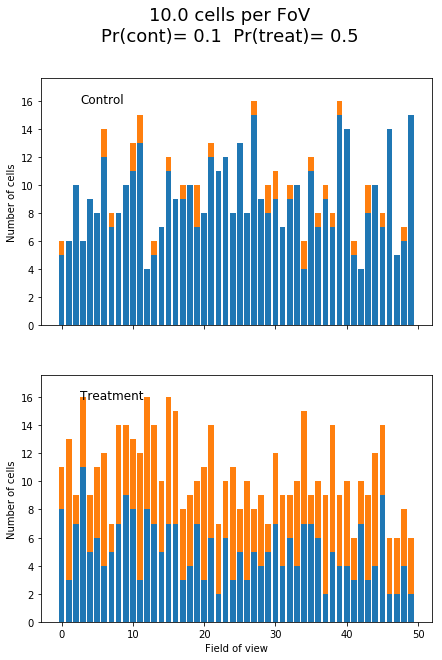

In [5]:
ncell_av     = 10
pr_control   = 0.05
pr_treatment = 0.50
df = gen_data(ncell_av,pr_control,pr_treatment)

fig,axs=plt.subplots(2,1,sharex=True,sharey=True,figsize=(7,10))
plot_bar_comp(df,axs)
plt.suptitle("{:.1f} cells per FoV\nPr(cont)={:4.1f}  Pr(treat)={:4.1f}".format(ncell_av,pr_control,pr_treatment), fontsize=18 );

In [6]:
tab=df.groupby(['code']).sum()
print(tab)

      pos  neg
code          
C      33  447
T     269  258


In [7]:
outp=stats.fisher_exact(np.array(tab))
outp[1]

8.42945988810212e-58

In [16]:
ncell_av     = 3
pr_control   = 0.05
pr_treatment = 0.25
nimgs=np.array([5,10,15,20,25])
nrep=100

pvals = np.zeros([len(nimgs),nrep,2])
for j,nimg in enumerate(nimgs):
    for i in range(nrep):
        df = gen_data(ncell_av ,pr_control,pr_treatment,nimg=nimg)
        pvals[j,i,0]=nimg
        tab = df.groupby(['code']).sum()
        pvals[j,i,1]=stats.fisher_exact(np.array(tab))[1]
#pvals = pvals.reshape([-1,2])

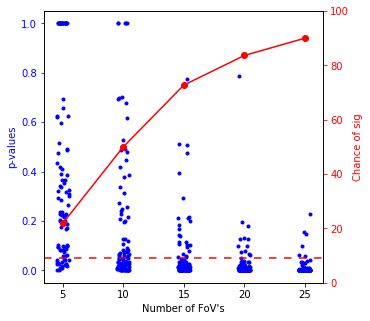

In [17]:
fig,ax = plt.subplots(figsize=(5,5))
plot_pval(pvals,ax)
ax.set_xlabel("Number of FoV's");